### **Data Preparation**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#load data
df = pd.read_excel("C:/Users/User/Downloads/ageingr.xlsx")

# Age as target variable
df['Ticket_Age'] = df['Age']

# relevant features
features = ['Priority', 'Assignment group', 'Region', 'Incident state', 'Configuration Item']
df_model = df[features + ['Ticket_Age']].copy()

# Handle missing values
df_model.fillna('Unknown', inplace=True)

# encode categorical variables
categorical_features = ['Priority', 'Assignment group', 'Region', 'Incident state', 'Configuration Item']
for col in categorical_features:
    df[col] = df[col].fillna('Unknown')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
# Final feature selection
X = df[features]
y = df['Ticket_Age']

### **Train-Test Split**

In [9]:
from sklearn.model_selection import train_test_split

# split the data (80%-20%)
# Model A: Include ALL tickets
X_train_all, X_test_all, y_train, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

# Model B: Exclude tickets older than 500 days
mask = df_model['Ticket_Age'] < 500
X_under500 = X[mask]
y_under500 = y[mask]

X_train_u500, X_test_u500, y_train_u500, y_test_u500 = train_test_split(X_under500, y_under500, test_size=0.2, random_state=42)

### **Training Models**

In [13]:
# Random Forest:

from sklearn.ensemble import RandomForestRegressor

rf_all = RandomForestRegressor(n_estimators=100, random_state=42)
rf_all.fit(X_train_all, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Gradient Boosting (GBM):

from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### **Evaluate Model Performance**

In [15]:
# RF

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R²:", r2)

# Evaluate Random Forest
print("Model A (All Tickets):")
evaluate_model(rf_all, X_test_all, y_test_all)


Model A (All Tickets):
MAE: 70.61452726579637
RMSE: 145.7388006417946
R²: 0.582122563935352


Insights:

1) MAE: 70.6 days = Typically, your model's predictions differ from the real ticket age by about 70 days. 
2) RMSE (measures how far predictions usually are from reality): 145.74 days = A high RMSE means your model sometimes predicts ticket ages that are very different from the actual ages.
3) R²: Around 0.58 = This is moderate performance

In [17]:
# Train Model B (Tickets < 500 days)
rf_u500 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_u500.fit(X_train_u500, y_train_u500)

# Evaluate Model B
print("\nModel B (Tickets < 500 days):")
evaluate_model(rf_u500, X_test_u500, y_test_u500)


Model B (Tickets < 500 days):
MAE: 45.88394574169553
RMSE: 83.12120392170083
R²: 0.5269673449750014


In [19]:
# GBM

# Predict and evaluate
predictions_gbm = gbm.predict(X_test)

# Evaluate clearly:
mae_gbm = mean_absolute_error(y_test, predictions_gbm)
rmse_gbm = mean_squared_error(y_test, predictions_gbm, squared=False)
r2_gbm = r2_score(y_test, predictions_gbm)

print("GBM Results:")
print("MAE:", mae_gbm)
print("RMSE:", rmse_gbm)
print("R²:", r2_gbm)

GBM Results:
MAE: 92.45572662200004
RMSE: 157.53595427296034
R²: 0.5117323906057692


The result of GBM much higher than RF. Hence, we will proceed with RF

### **Feature Importance**

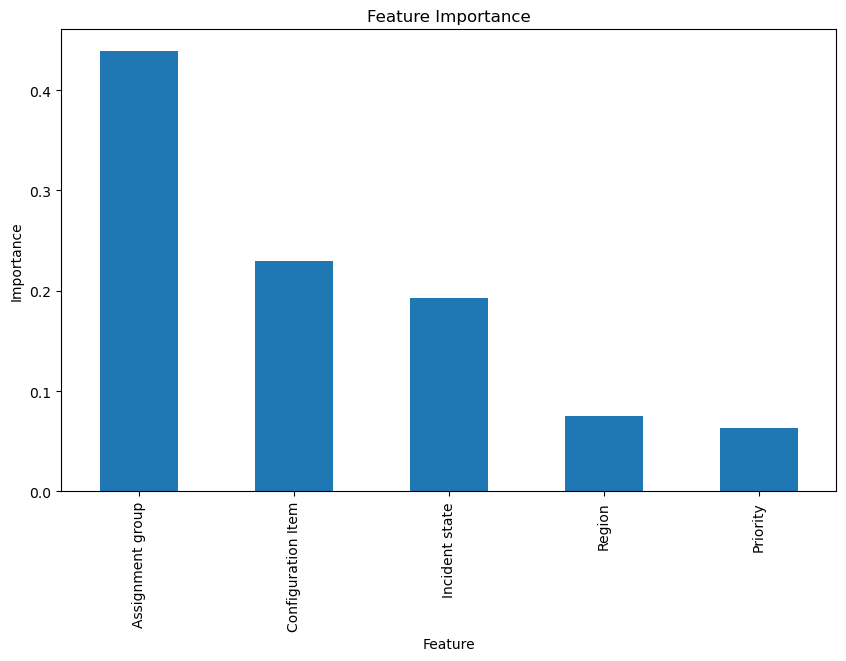

In [8]:
import matplotlib.pyplot as plt

# Feature importance
importances = rf.feature_importances_
features_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

features_importances.plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
